In [2]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt 
import seaborn as sns

IMPORT THE DATA

In [3]:
dataset = pd.read_csv('data.csv')
dataset

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,NaN,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,Just not interested! (Want to work in the corp...,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,NaN,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,Lack of Knowledge,0


GET INSIGHT ABOUT THE DATA

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

# DATA CLEANING

In [5]:
useless_column = ['y', 'ReasonsForLack', 'KeyTraits']

for col in useless_column:
    del dataset[col]
    
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
dtypes: int64(8), object(6)
memory usage: 24.1+ KB


CHECKING FOR EMPTY CELLS

In [6]:
dataset.isna().sum()

EducationSector           0
IndividualProject         0
Age                       0
Gender                    0
City                      0
Influenced                0
Perseverance              0
DesireToTakeInitiative    0
Competitiveness           0
SelfReliance              0
StrongNeedToAchieve       0
SelfConfidence            0
GoodPhysicalHealth        0
MentalDisorder            0
dtype: int64

CHECKING THE VALUE INSIDE EVERY COLUMN

In [7]:
print (dataset.apply(lambda x: x.nunique()))

EducationSector            9
IndividualProject          2
Age                       10
Gender                     2
City                       2
Influenced                 2
Perseverance               5
DesireToTakeInitiative     5
Competitiveness            5
SelfReliance               5
StrongNeedToAchieve        5
SelfConfidence             5
GoodPhysicalHealth         5
MentalDisorder             2
dtype: int64


In [8]:
print (dataset.apply(lambda x: x.unique()))

EducationSector           [Engineering Sciences, Others, Economic Scienc...
IndividualProject                                                 [No, Yes]
Age                                [19, 22, 18, 20, 17, 21, 23, 26, 24, 25]
Gender                                                       [Male, Female]
City                                                              [Yes, No]
Influenced                                                        [No, Yes]
Perseverance                                                [2, 3, 4, 1, 5]
DesireToTakeInitiative                                      [2, 3, 4, 1, 5]
Competitiveness                                             [3, 4, 2, 5, 1]
SelfReliance                                                [3, 4, 1, 2, 5]
StrongNeedToAchieve                                         [2, 4, 3, 5, 1]
SelfConfidence                                              [2, 3, 4, 1, 5]
GoodPhysicalHealth                                          [3, 4, 2, 1, 5]
MentalDisord

In [9]:
dataset.EducationSector.unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Language and Cultural Studies'],
      dtype=object)

# DATA TRANSFORMATION

In [10]:
uncleaned_cols = ['EducationSector', 'IndividualProject', 'Gender', 'City', 'Influenced', 'MentalDisorder']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
trans_dataset = cp.deepcopy(dataset)

for col in uncleaned_cols:
    trans_dataset[col] = encoder.fit_transform(trans_dataset[col])

trans_dataset

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder
0,2,0,19,1,1,0,2,2,3,3,2,2,3,1
1,2,1,22,1,0,1,3,3,3,4,4,3,4,1
2,2,0,18,1,1,0,3,4,3,3,3,4,4,0
3,2,1,20,1,1,1,3,3,3,3,4,3,3,0
4,2,1,19,1,1,1,2,3,3,3,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2,1,19,1,1,1,4,5,4,3,4,4,5,1
215,2,1,19,1,1,0,2,2,2,2,2,2,2,0
216,2,1,22,0,1,1,3,4,4,3,4,4,3,0
217,2,0,19,1,1,0,1,2,2,3,3,2,2,0


In [11]:
trans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   EducationSector         219 non-null    int32
 1   IndividualProject       219 non-null    int32
 2   Age                     219 non-null    int64
 3   Gender                  219 non-null    int32
 4   City                    219 non-null    int32
 5   Influenced              219 non-null    int32
 6   Perseverance            219 non-null    int64
 7   DesireToTakeInitiative  219 non-null    int64
 8   Competitiveness         219 non-null    int64
 9   SelfReliance            219 non-null    int64
 10  StrongNeedToAchieve     219 non-null    int64
 11  SelfConfidence          219 non-null    int64
 12  GoodPhysicalHealth      219 non-null    int64
 13  MentalDisorder          219 non-null    int32
dtypes: int32(6), int64(8)
memory usage: 18.9 KB


# FEATURE SELECTION
DIAGNOSTIC ANALYSIS: WHICH FEATURES ARE THE MOST AFFECTING MENTAL ILLNESS AMONG STUDENTS?

In [12]:
from sklearn.feature_selection import chi2

x=trans_dataset.iloc[:,:-1]  #Independent variable
y=trans_dataset.iloc[:,-1]   #Target variable

In [13]:
x

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
0,2,0,19,1,1,0,2,2,3,3,2,2,3
1,2,1,22,1,0,1,3,3,3,4,4,3,4
2,2,0,18,1,1,0,3,4,3,3,3,4,4
3,2,1,20,1,1,1,3,3,3,3,4,3,3
4,2,1,19,1,1,1,2,3,3,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2,1,19,1,1,1,4,5,4,3,4,4,5
215,2,1,19,1,1,0,2,2,2,2,2,2,2
216,2,1,22,0,1,1,3,4,4,3,4,4,3
217,2,0,19,1,1,0,1,2,2,3,3,2,2


In [14]:
y

0      1
1      1
2      0
3      0
4      1
      ..
214    1
215    0
216    0
217    0
218    0
Name: MentalDisorder, Length: 219, dtype: int32

USING CHI SQUARE TO KNOW CORRELATION SCORE FOR EVERY FEATURES TO THE TARGET VARIABLE

In [15]:
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([0.91171964, 0.88437256, 0.0676614 , 0.05378584, 0.06108375,
        0.02090203, 0.04109291, 0.16840919, 0.17287422, 0.27644778,
        0.26461705, 0.02049615, 0.02617091]),
 array([0.33965856, 0.34700686, 0.79477271, 0.8166019 , 0.80479115,
        0.88504618, 0.83935868, 0.6815295 , 0.67756993, 0.59903898,
        0.60696577, 0.88616005, 0.87148364]))

In [16]:
# printing p values for each categorical features
chi_value=pd.Series(f_score[0],index=x.columns)
chi_value.sort_values(ascending=False,inplace=True)
chi_value

EducationSector           0.911720
IndividualProject         0.884373
SelfReliance              0.276448
StrongNeedToAchieve       0.264617
Competitiveness           0.172874
DesireToTakeInitiative    0.168409
Age                       0.067661
City                      0.061084
Gender                    0.053786
Perseverance              0.041093
GoodPhysicalHealth        0.026171
Influenced                0.020902
SelfConfidence            0.020496
dtype: float64

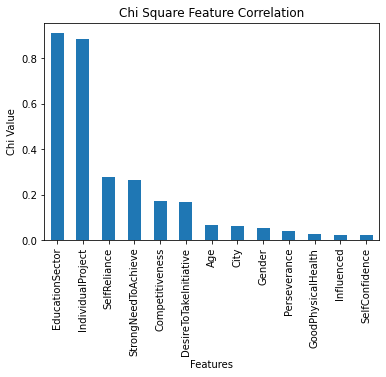

In [17]:
chi_value.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Chi Value")
plt.title("Chi Square Feature Correlation")
plt.show()